# <center> **Titanic**

# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


import functions
import importlib

import warnings

importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Dell\\Documents\\AI\\Titanic\\Notebooks\\functions.py'>

# **Display Parameters**

## **Display Features**

In [2]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

## **Colors**

In [3]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## **Figure Parameters**

In [4]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
    "figure.figsize": (10, 6),
}

# **Data Overview and Preprocessing**

In [5]:
train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\Data\train.csv",
    index_col=False
)

test = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\Data\test.csv",
    index_col=False
)

random_state = 101
target = 'Transported'

## **Missing Data**

### **Train Set Missing Values**

In [6]:
missing_values = functions.MissingValues(train)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


### **Test Set Missing Values**

In [7]:
missing_values = functions.MissingValues(test)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


# **Information Extraction**

## **PassengerId**

In [8]:
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

In [9]:
train['GroupSize']=train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['GroupSize']=test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

In [10]:
column = train.pop('Group')
train.insert(1, 'Group', column)

column = test.pop('Group')
test.insert(1, 'Group', column)

column = train.pop('GroupSize') 
train.insert(2, 'GroupSize', column)    

column = test.pop('GroupSize')  
test.insert(2, 'GroupSize', column)

## **Lone Traveler**

In [11]:
train['LoneTraveler'] = train['GroupSize'].apply(lambda x: 1 if x == 1 else 0)
test['LoneTraveler'] = test['GroupSize'].apply(lambda x: 1 if x == 1 else 0)

In [12]:
column = train.pop('LoneTraveler')
train.insert(3, 'LoneTraveler', column)

column = test.pop('LoneTraveler')
test.insert(3, 'LoneTraveler', column)

## **Cabin**

In [13]:
train[['CabinDeck', 'CabinNumber', 'CabinSide']] = train['Cabin'].str.split('/', expand=True)
test[['CabinDeck', 'CabinNumber', 'CabinSide']] = test['Cabin'].str.split('/', expand=True)

In [14]:
column = train.pop('CabinDeck')
train.insert(5, 'CabinDeck', column)
column = test.pop('CabinDeck')
test.insert(5, 'CabinDeck', column)

column = train.pop('CabinNumber') 
train.insert(6, 'CabinNumber', column)  
column = test.pop('CabinNumber') 
test.insert(6, 'CabinNumber', column)    

column = test.pop('CabinSide')  
test.insert(7, 'CabinSide', column)
column = train.pop('CabinSide') 
train.insert(7, 'CabinSide', column)    

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [15]:
train.head()

,PassengerId,Group,GroupSize,LoneTraveler,HomePlanet,CabinDeck,CabinNumber,CabinSide,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,1,1,Europa,B,0,P,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,2,1,1,Earth,F,0,S,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,3,2,0,Europa,A,0,S,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,3,2,0,Europa,A,0,S,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,4,1,1,Earth,F,1,S,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## **Name**

In [16]:
train[['FirstName', 'LastName']] = train['Name'].str.split(' ', expand=True)
test[['FirstName', 'LastName']] = test['Name'].str.split(' ', expand=True)

In [17]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

## **Amount Spent**

In [18]:
train['AmountSpent'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0).sum(axis=1)
test['AmountSpent'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0).sum(axis=1)

In [19]:
column = train.pop('AmountSpent')
train.insert(17, 'AmountSpent', column)

column = test.pop('AmountSpent')
test.insert(17, 'AmountSpent', column)

## **Spent**

In [20]:
train['Spent'] = train['AmountSpent'].apply(lambda x: 1 if x > 0 else 0)
test['Spent'] = test['AmountSpent'].apply(lambda x: 1 if x > 0 else 0)

In [21]:
column = train.pop('Spent')
train.insert(18, 'Spent', column)

column = test.pop('Spent')
test.insert(18, 'Spent', column)

## **Age Groups**

In [22]:
train['AgeGroup']=np.nan
train.loc[train['Age']<=10,'AgeGroup']='0-10'
train.loc[(train['Age']>10) & (train['Age']<=20),'AgeGroup']='11-20'
train.loc[(train['Age']>20) & (train['Age']<=30),'AgeGroup']='21-30'
train.loc[(train['Age']>30) & (train['Age']<=40),'AgeGroup']='31-40'
train.loc[(train['Age']>40) & (train['Age']<=50),'AgeGroup']='41-50'
train.loc[(train['Age']>50) & (train['Age']<=60),'AgeGroup']='51-60'
train.loc[(train['Age']>60) & (train['Age']<=70),'AgeGroup']='61-70'
train.loc[(train['Age']>70) & (train['Age']<=80),'AgeGroup']='71-80'

# New features - test set
test['AgeGroup']=np.nan
test.loc[test['Age']<=10,'AgeGroup']='0-10'
test.loc[(test['Age']>10) & (test['Age']<=20),'AgeGroup']='11-20'
test.loc[(test['Age']>20) & (test['Age']<=30),'AgeGroup']='21-30'
test.loc[(test['Age']>30) & (test['Age']<=40),'AgeGroup']='31-40'
test.loc[(test['Age']>40) & (test['Age']<=50),'AgeGroup']='41-50'
test.loc[(test['Age']>50) & (test['Age']<=60),'AgeGroup']='51-60'
test.loc[(test['Age']>60) & (test['Age']<=70),'AgeGroup']='61-70'
test.loc[(test['Age']>70) & (test['Age']<=80),'AgeGroup']='71-80'

In [23]:
column = train.pop('AgeGroup')
train.insert(11, 'AgeGroup', column)

column = test.pop('AgeGroup')
test.insert(11, 'AgeGroup', column)

## **Family Size**

In [24]:
train['LastName'].fillna('Unknown', inplace=True)
test['LastName'].fillna('Unknown', inplace=True)

train['FamilySize']=train['LastName'].map(lambda x: pd.concat([train['LastName'],test['LastName']]).value_counts()[x])
test['FamilySize']=test['LastName'].map(lambda x: pd.concat([train['LastName'],test['LastName']]).value_counts()[x])

column = train.pop('FamilySize')
train.insert(3, 'FamilySize', column)

column = test.pop('FamilySize')
test.insert(3, 'FamilySize', column)

# **Age**

<Axes: xlabel='AgeCat', ylabel='TransportedPercentage'>

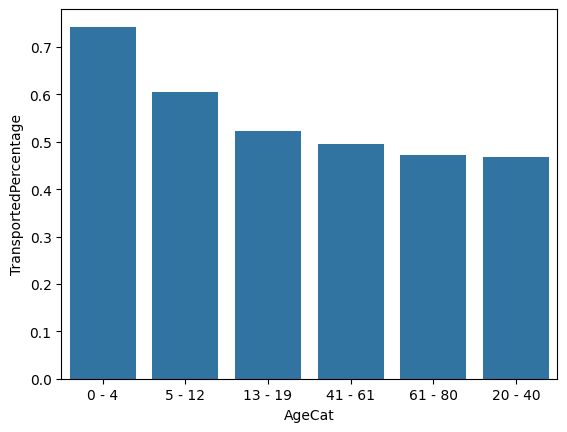

In [26]:
# Extract Age Category column from Age column
train["AgeCat"] = pd.cut(train.Age, bins = [0.0, 4.0, 12.0, 19.0, 40.0, 60.0, 80.0], labels = ['0 - 4', '5 - 12', '13 - 19', '20 - 40', '41 - 61', '61 - 80'])

AgeCat_Transported = train.groupby('AgeCat').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

# create dataframe AgeCat_Transported that has the Age Category and the percentage transported
AgeCat_Transported['TransportedPercentage'] = AgeCat_Transported['Transported'] / AgeCat_Transported['PassengerId']

# Visualize AgeCat vs transported
sns.barplot(x = "AgeCat", y = "TransportedPercentage", data = AgeCat_Transported, order = AgeCat_Transported.sort_values('TransportedPercentage', ascending = False).AgeCat)